In [1]:
import pandas as pd
import numpy as np

In [2]:
ukD = pd.read_csv('autism_screening.csv',na_values='?')
ukD.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO


In [3]:
ukD.columns

#ukD.replace('?',np.nan,inplace=True)
ukD.isna().sum()

#ukD.head()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [4]:
ukD.dropna(inplace=True)
ukD.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [5]:
ukD.columns


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()


categorical = ukD.select_dtypes(exclude=['int64','float64']).columns.to_list()



for i in categorical:
    ukD[i] = lbl.fit_transform(ukD[i])
    
ukD.head()
categorical

['gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'age_desc',
 'relation',
 'Class/ASD']

In [7]:
x = ukD.drop(['Class/ASD','relation','contry_of_res','ethnicity'],axis=1)
y = ukD['Class/ASD']


In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



x_train.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,age_desc
168,0,0,1,1,1,0,0,1,1,1,36.0,0,0,1,0,6.0,0
264,1,0,0,0,1,0,0,1,1,0,23.0,0,0,0,0,4.0,0
629,1,0,0,0,1,0,1,1,1,1,23.0,0,0,0,0,6.0,0
671,1,1,1,1,1,0,0,1,0,1,21.0,1,0,0,0,7.0,0
166,0,0,1,0,0,0,0,1,1,1,26.0,0,0,0,0,4.0,0
522,1,1,1,1,1,0,1,0,1,0,47.0,0,1,1,0,7.0,0
609,1,0,0,1,0,0,1,1,0,0,25.0,1,0,0,0,4.0,0
10,1,1,1,1,1,1,1,1,1,1,33.0,1,0,0,0,10.0,0
632,0,0,1,0,0,0,0,1,0,0,28.0,0,0,0,0,2.0,0
409,1,1,0,0,0,0,0,0,0,0,22.0,0,0,0,0,2.0,0


In [13]:
from sklearn.tree import DecisionTreeClassifier

Dtree_uk = DecisionTreeClassifier(criterion='gini',max_depth=3)

Dtree_uk.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [14]:
print("Testing Accuracy:",Dtree_uk.score(x_test,y_test))
print("Training Accuracy:",Dtree_uk.score(x_train,y_train))

Testing Accuracy: 1.0
Training Accuracy: 1.0


[Text(0.5, 0.75, 'x[15] <= 6.5\ngini = 0.408\nsamples = 487\nvalue = [348, 139]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 348\nvalue = [348, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 139\nvalue = [0, 139]')]

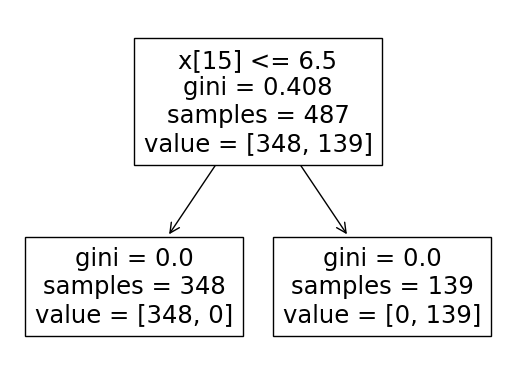

In [15]:

from sklearn import tree
tree.plot_tree(Dtree_uk.fit(x_train,y_train))